In [2]:
import pandas as pd
import numpy as numpy
import scipy.spatial.distance as scp_dst
from scipy.spatial import distance
from sklearn.cluster import KMeans
import matplotlib.colors as clrs
import matplotlib.pyplot as plt
import json
from pprint import pprint
from pandas.io.json import json_normalize

with open('aminer_papers_0_s3.json') as data_file:    
    data0 = json.load(data_file)

# with open('aminer_papers_1_s3.json') as data_file:    
#     data1 = json.load(data_file)
    
# with open('aminer_papers_2_s3.json') as data_file:    
#     data2 = json.load(data_file)

# with open('aminer_papers_3_s3.json') as data_file:    
#     data3 = json.load(data_file)




    
# data
# f = open('test.json','r')
# data = f.read()
# data


# json_normalize(data)
# df['authors']
# df

In [3]:
# TODO: Merge dataframes
df0 = pd.DataFrame.from_dict(json_normalize(data0), orient='columns')
df0.head(10)

# Get CS keywords

df0_new = df0.dropna(subset=['keywords']) #262153
df0_new.head(20)


,abstract,authors,doi,id,isbn,issn,issue,keywords,lang,n_citation,page_end,page_start,pdf,references,title,url,venue,volume,year
2,The method to making technology roadmap is int...,"[{'name': 'MO Chou'}, {'name': 'CHEN Jiqing'},...",NaN,53e99784b7602d9701f3e132,NaN,NaN,19,"[science and technology production, technology...",zh,NaN,95,90,NaN,NaN,Practice Research on Technology Roadmap for El...,NaN,Science and Technology Management Research,NaN,2013
3,Drought is the first place in all the natural ...,"[{'name': 'Peijuan Wang'}, {'name': 'Jiahua Zh...",10.1109/IGARSS.2011.6049503,53e99784b7602d9701f3e133,NaN,NaN,null,"[canopy parameters, canopy spectrum, different...",en,NaN,1933,1930,NaN,"[53e999c3b7602d970220b9b7, 53e9b1d6b7602d9703c...",The relationship between canopy parameters and...,[http://dx.doi.org/10.1109/IGARSS.2011.6049503],IGARSS,null,2011
4,Determination of total sugar can serve to moni...,[{'org': 'Yantai Institute of Coastal Zone Res...,NaN,53e99784b7602d9701f3e135,NaN,NaN,07,"[metabolites, Jerusalem artichoke, total sugar...",zh,1,93+97,90,NaN,NaN,The effect of metabolites on the determination...,NaN,Food Science and Technology,NaN,2012
7,This paper discussed the planning and design m...,[{'org': 'School of Resource and Environmental...,NaN,53e99784b7602d9701f3e139,NaN,NaN,28,"[Planning and design method, Mountainous regio...",zh,1,364,362,NaN,NaN,Planning and Design Method of Land Consolidati...,NaN,Journal of Anhui Agricultural Sciences,NaN,2012
8,Rough set is a mathematical tool to deal with ...,NaN,NaN,53e99784b7602d9701f3e13a,NaN,NaN,11,"[Data Mining, Rough Set, Algorithm, Rules Extr...",zh,3,106,104,NaN,NaN,A Data Mining Based on Rough Set Theory,NaN,Software Guide,NaN,2012
12,Tumor necrosis factor-alpha (TNF-α) is a multi...,"[{'org': 'Department of Biology, Faculty of Sc...",10.1007/s11010-010-0678-0,53e99784b7602d9701f3e13e,NaN,1573-4919,1-2,[glucagon-like peptide-2 � tnf-a/actinomycin d...,en,NaN,27,13,NaN,"[53e99b4ab7602d97023ea8fd, 53e997f8b7602d9701f...",The role of glucagon-like peptide-2 on apoptos...,"[http://dx.doi.org/10.1007/s11010-010-0678-0, ...",Molecular and cellular biochemistry,350,2011
14,The carbon fiber used PAN as precursor is wide...,[{'org': 'China Synthetic Fiber Information Ce...,NaN,53e99784b7602d9701f3e140,NaN,NaN,10,"[production technology, carbon fiber, present ...",zh,18,10+22,5,NaN,NaN,Present Situation of China Carbon Fiber Indust...,NaN,Synthetic Fiber in China,NaN,2009
15,NaN,"[{'name': 'Carmen Sandoval C'}, {'name': 'Alic...",10.4067/S0716-10182008000600009,53e99784b7602d9701f3e141,NaN,NaN,6,"[severity of illness index, retrospective stud...",en,NaN,NaN,NaN,NaN,"[53e9b458b7602d9703f55c97, 53e9bc79b7602d97048...",Síndrome de Ramsay-Himt en Pediatría: Reporte ...,[http://dx.doi.org/10.4067/S0716-1018200800060...,Revista Chilena De Infectologia,25,2008
16,Using a cryogenic scanned probe microscope (SP...,[{'org': 'Division of Applied Sciences and Dep...,10.1006/spmi.1996.0100,53e99784b7602d9701f3e142,NaN,Superlattices and Microstructures,4,"[scanning probe microscope, two dimensional el...",en,18,440,435,NaN,NaN,Effect of a charged scanned probe microscope t...,[http://dx.doi.org/10.1006/spmi.1996.0100],Superlattices and Microstructures,20,1996
23,This paper presents an embedded controller of ...,NaN,NaN,53e99784b7602d9701f3e150,NaN,NaN,02,"[communication protocol, FT245BM chip, embedde...",zh,1,45,43,NaN,NaN,The application of an embedded controller to a...,NaN,Industrial Instrumentation & Automation,NaN,2005


In [4]:
from collections import defaultdict

df0_new.shape

keyword_count = defaultdict(dict)
for row in df0_new.itertuples(): 
    current_keywords = row[8]
    for keyword in current_keywords:
        low_case_keyword = keyword.lower()
        if(low_case_keyword in keyword_count):
            keyword_count[low_case_keyword] = keyword_count[low_case_keyword] + 1
        else:
            keyword_count[low_case_keyword] = 0
        break;
    
    

In [5]:
# keyword_count

keyword_count_sorted = sorted(keyword_count.items(), key=lambda x: x[1], reverse=True)
keyword_count_sorted
#     print (keyword)
#     print (count)
#     break
    

[('bioinformatics', 5038),
 ('biomedical research', 4859),
 ('nature', 3647),
 ('british', 1240),
 ('genetics', 709),
 ('indexation', 372),
 ('first page', 344),
 ('spectrum', 319),
 ('higher education', 314),
 ('enzyme', 275),
 ('diagnosis', 272),
 ('kinetics', 263),
 ('iron', 247),
 ('satisfiability', 242),
 ('oscillations', 240),
 ('diabetes mellitus', 229),
 ('application', 226),
 ('humanidades', 214),
 ('high energy physics', 208),
 ('null', 203),
 ('cutaneous biology', 202),
 ('public health', 194),
 ('global warming', 194),
 ('human factors', 193),
 ('thermodynamics', 185),
 ('risk factors', 185),
 ('pediatric', 181),
 ('ergonomics', 180),
 ('nursing', 178),
 ('injury prevention', 178),
 ('magnetic field', 177),
 ('copper', 177),
 ('quantum mechanics', 176),
 ('american college of gastroenterology', 176),
 ('cross section', 175),
 ('occupational safety', 174),
 ('breast cancer', 173),
 ('text mining', 166),
 ('health care', 166),
 ('digital library', 165),
 ('history', 161),
 ('

In [6]:
cs_keywords = ['internet','text mining','data mining', 'polymorphism','mathematical model','information','information technology', 'data', 'algorithms', 'training', 
              'model','data collection','analysis','neural network','data analysis','computer science', 'information retrieval', 'information system', 'classification','pattern recognition'
               'signal processing','software engineering','social network','software system','image processing','data processing',
              'computer simulation','statistical analysis','image', 'video', 'machine', 'learning', 'computer', 'optimization', 'artificial', 'intelligence', 'complexity']
cs_papers = []

for row in df0_new.itertuples(): 
    current_keywords = row[8]
    for keyword in current_keywords:
        low_case_keyword = keyword.lower()
        if(low_case_keyword in cs_keywords):
            cs_papers.append(row[4])
            break;
            
# cs_papers.get(0) #10617

In [7]:
df0_new.dtypes

abstract       object
authors        object
doi            object
id             object
isbn           object
issn           object
issue          object
keywords       object
lang           object
n_citation    float64
page_end       object
page_start     object
pdf            object
references     object
title          object
url            object
venue          object
volume         object
year          float64
dtype: object

In [8]:
# Create CS data-frame
import math
import types

cs_papers_and_ref_papers = defaultdict(dict)

for row in df0_new.itertuples(): 
    current_keywords = row[8]
    for keyword in current_keywords:
        low_case_keyword = keyword.lower()
        if(low_case_keyword in cs_keywords):
            cs_papers_and_ref_papers[row[4]] = True
            references = row[14]
            if(type(references) is list):   
                for ref in references:
                    cs_papers_and_ref_papers[ref] = True
            break;

cs_dataframe = pd.DataFrame.from_items([(name, pd.Series(data=None, dtype=series.dtype)) for name, series in df0_new.iteritems()])
cs_dataframe

for row in df0_new.itertuples():
    paper_id = row[4]
    if(paper_id in cs_papers_and_ref_papers):
        cs_dataframe.loc[len(cs_dataframe)] = df0_new.loc[row[0]]
        
cs_dataframe.shape

(12101, 19)

In [9]:
# # Map of papers which are cited/not cited -- important to discard the disconnected components

# cs_papers_cited_uncited_map = {} # Papers which have atleast one citation

# for row in cs_dataframe.itertuples(): 
#     current_paper_id = row[4]
#     references = row[14]
#     if(type(references) is list): 
#         for ref in references:
#             cs_papers_cited_uncited_map[ref] = True
            

In [10]:
# Create map of paper_id vs number

# Old code which was labling all the papers (cited and uncited)
cs_papers_number_map = {}
index = 0 # TODO: Deep-walk label starts from '1' afaik
for row in cs_dataframe.itertuples(): 
    current_paper_id = row[4]
    cs_papers_number_map[current_paper_id] = index
    index = index + 1
cs_papers_number_map    
# # dumping the map for debugging purpose
# f = open('graph-id-number-map.txt','w')
# f.write(str(cs_papers_number_map))
# f.close()

# cs_papers_number_map = {}
# index = 0
# for row in cs_dataframe.itertuples(): 
#     current_paper_id = row[4]
#     if(current_paper_id in cs_papers_cited_uncited_map):
#         cs_papers_number_map[current_paper_id] = index
#         index = index + 1


{'53e997dcb7602d9701fd0a88': 3031,
 '53e99822b7602d970204315f': 10498,
 '53e99821b7602d97020409a8': 10274,
 '53e997fcb7602d9702006d28': 6584,
 '53e997b9b7602d9701f9d98b': 988,
 '53e997aeb7602d9701f89073': 719,
 '53e99832b7602d9702056a69': 11614,
 '53e997d1b7602d9701fc802d': 2375,
 '53e997bab7602d9701fa3365': 1091,
 '53e997f5b7602d9701ff9f02': 5807,
 '53e997ecb7602d9701fea526': 4782,
 '53e9982cb7602d9702050183': 11199,
 '53e99796b7602d9701f5f21f': 152,
 '53e997f9b7602d9702001a23': 6223,
 '53e9981db7602d97020392c0': 9713,
 '53e9982cb7602d970204e520': 11096,
 '53e997ccb7602d9701fc0034': 1708,
 '53e99792b7602d9701f5b3cd': 88,
 '53e997ddb7602d9701fd34b4': 3232,
 '53e997f1b7602d9701ff2416': 5244,
 '53e99818b7602d9702032fbd': 9370,
 '53e997ecb7602d9701fe8bb7': 4683,
 '53e997fcb7602d9702007468': 6601,
 '53e9978db7602d9701f4e7d0': 46,
 '53e99803b7602d9702015240': 7363,
 '53e997f4b7602d9701ff7e51': 5621,
 '53e997ecb7602d9701fe91f8': 4703,
 '53e997f8b7602d9702000557': 6131,
 '53e99809b7602d970202

In [11]:
# Create citations graph - adjacency matrix
from collections import defaultdict

# safety checks - 
cs_dataframe = cs_dataframe.dropna(subset=['id'])
 
citation_graph = defaultdict(dict)
citation_graph_adj_list = []

for row in cs_dataframe.itertuples(): 
    current_paper_id = row[4]
    references = row[14]
    if(type(references) is list): 
        for ref in references:
            citation_graph[ref][current_paper_id] = 1

citation_graph    

# df_new = df_new[numpy.isfinite(df_new['references'])]
# df_new
# df[np.isfinite(df['EPS'])]

defaultdict(dict,
            {'56d89636dabfae2eee111c25': {'53e9981db7602d97020371c2': 1},
             '53e9b13eb7602d9703bc1bad': {'53e9982cb7602d970204fbf2': 1},
             '53e9af8db7602d97039d760e': {'53e99804b7602d97020193c1': 1},
             '53e9bc96b7602d970491649d': {'53e997b5b7602d9701f99c80': 1},
             '53e99a0ab7602d970225b6cb': {'53e99832b7602d9702057ada': 1},
             '53e9ae04b7602d970380f5d9': {'53e997f1b7602d9701fefe64': 1},
             '53e997f5b7602d9701ff9f02': {'53e997d7b7602d9701fd012a': 1},
             '53e9a5f0b7602d9702f19edc': {'53e9979eb7602d9701f6ee9a': 1},
             '53e9bac9b7602d97046f91fa': {'53e997d6b7602d9701fc948f': 1,
              '53e9980eb7602d9702027f97': 1},
             '53e99dbfb7602d970267f0a0': {'53e9979bb7602d9701f66850': 1},
             '53e9aa16b7602d9703385e5f': {'53e997bab7602d9701fa1ec4': 1},
             '53e9a45cb7602d9702d7a3c0': {'53e997bab7602d9701fa1ec4': 1},
             '53e9b7f4b7602d97043a2d9e': {'53e997

In [12]:
# Create citations graph - adjacency list

from collections import defaultdict

# safety checks - 
cs_dataframe = cs_dataframe.dropna(subset=['id'])
 
citation_graph_adj_list = {}

# cnt = 0
for row in cs_dataframe.itertuples(): 
    current_paper_id = row[4]
    references = row[14]
    if(type(references) is list): 
        for ref in references:
            # Ignore the paper for which we don't have entry in cs_paper -- not a "cs_paper"
            if (ref in cs_papers_number_map): 
                ref_number = cs_papers_number_map[ref]
#                 print (ref_number)
#     cnt = cnt + 1            
#     if( cnt > 500):
#         break 
                # Putting an edge in the graph (adj_list)
                if (ref_number in citation_graph_adj_list):
                    elements = citation_graph_adj_list[ref_number]
                    elements.add(cs_papers_number_map[current_paper_id])
                    citation_graph_adj_list[ref_number] = elements
                else:    
                    first_element = set([cs_papers_number_map[current_paper_id]])
                    citation_graph_adj_list[ref_number] = first_element
        
citation_graph_adj_list    

# df_new = df_ne

{4100: {4449},
 4103: {187, 6802, 6916, 11398},
 8200: {8199},
 4105: {4105},
 4107: {7956},
 4109: {4886},
 8209: {8902, 9027},
 8210: {3310},
 10926: {5200},
 8214: {4972},
 8215: {7170},
 8216: {8217},
 8217: {8217},
 8218: {8299},
 4125: {6151},
 1371: {1207},
 4310: {4389},
 8230: {8223},
 4135: {6471},
 4137: {242},
 1364: {4953},
 4141: {1350, 5300},
 4145: {4087, 11676},
 8243: {8082},
 4150: {1272, 1403, 2953, 9960},
 8251: {6039, 6047},
 4157: {1067},
 8254: {10754},
 8885: {9183},
 4165: {824},
 8262: {7437},
 8263: {8854},
 8264: {3984, 6699},
 8265: {8265, 11059},
 8887: {906},
 164: {10412},
 8273: {664},
 8274: {314},
 4179: {1067},
 8276: {5963},
 4181: {6497},
 8280: {942},
 89: {10015},
 10255: {10544},
 8284: {5052, 6231},
 8890: {9262},
 4192: {3452},
 8290: {493},
 4196: {4040},
 4204: {4205},
 6203: {9572},
 4207: {4207, 10525},
 8304: {313},
 8305: {5577},
 8306: {6761},
 8308: {5934},
 8309: {7349, 8322},
 119: {1540},
 4216: {4202},
 121: {745, 3319, 10142},
 1

In [13]:
# Add missing labels in file -- papers which are being reffed by others but they don't have any refs (if they have, they wont be cs_papers!)

citation_graph_adj_list_with_all_labels = citation_graph_adj_list.copy()

for key, value in citation_graph_adj_list.items():
    for val in value:
        if val in citation_graph_adj_list:
            continue
        else:
            citation_graph_adj_list_with_all_labels[val] = {}
            
citation_graph_adj_list_with_all_labels

{8192: {},
 8197: {},
 8199: {},
 8200: {8199},
 8201: {},
 8209: {8902, 9027},
 8210: {3310},
 8214: {4972},
 8215: {7170},
 8216: {8217},
 8217: {8217},
 8218: {8299},
 8223: {},
 8227: {8357, 8602, 8660},
 8229: {9202, 9263},
 8230: {8223},
 8231: {8231},
 9564: {},
 8243: {8082},
 8246: {},
 8251: {6039, 6047},
 8253: {},
 8254: {10754},
 8256: {},
 8262: {7437},
 8263: {8854},
 8264: {3984, 6699},
 8265: {8265, 11059},
 8273: {664},
 8274: {314},
 8275: {5019, 11081},
 8276: {5963},
 8279: {},
 8280: {942},
 89: {10015},
 91: {},
 8284: {5052, 6231},
 8290: {493},
 8291: {},
 8299: {},
 110: {},
 8303: {8192},
 8304: {313},
 8305: {5577},
 8306: {6761},
 8308: {5934},
 8309: {7349, 8322},
 8310: {},
 119: {1540},
 121: {745, 3319, 10142},
 122: {7170, 7974},
 8316: {},
 127: {10144},
 128: {5481},
 8322: {7349},
 8325: {4169},
 134: {8437},
 135: {6375},
 136: {},
 139: {11412},
 1389: {9411},
 144: {9637},
 145: {},
 146: {145, 1126, 3762, 5317, 6710, 6771, 6819, 6942, 11171, 117

In [20]:
# Dumping adj_list to text file 

f = open('citation_graph.adlist','w')

for key, value in citation_graph_adj_list_with_all_labels.items():
    line = str(key)
    for x in value:
        line = line + ' ' + str(x)
    f.write(line + '\n')    
    
f.close()

(54, nan, [{'name': ''}], nan, '53e9978db7602d9701f516ed', nan, nan, '05', ['IPv6', 'IPv4', 'Internet'], 'zh', nan, '48', '46', nan, nan, 'IPv6在Internet网上的应用及其研究', nan, nan, nan, 2008.0)


In [ ]:
# import matplotlib.pyplot as plt

# emb_df_correlation = emb_df.corr()
# plt.imshow(emb_df_correlation, cmap = 'hot', interpolation = 'none')
# plt.xticks(range(len(emb_df_correlation)),emb_df_correlation.columns) 
# locs, labels = plt.xticks() 
# plt.setp(labels, rotation=40, ha='right') 
# ticks = plt.yticks(range(len(emb_df_correlation)), emb_df_correlation.columns) 
# plt.title('Correlation plot between different features in the data set') 
# plt.show()

/Users/punit/anaconda/envs/deep-walk-env/lib/python3.4/site-packages/matplotlib/image.py:649: UserWarning: The backend (<class 'matplotlib.backends.backend_macosx.RendererMac'>) does not support interpolation='none'. The image will be interpolated with 'nearest` mode.
  "mode." % renderer.__class__)


In [66]:
# Getting 50% of cs_dataframe to construct traning_dataframe
count = 0

training_dataframe = pd.DataFrame.from_items([(name, pd.Series(data=None, dtype=series.dtype)) for name, series in cs_dataframe.iteritems()])
for row in cs_dataframe.itertuples():
    if count % 2 == 0:
        training_dataframe.loc[len(training_dataframe)] = cs_dataframe.loc[row[0]]
    count = count + 1    
training_dataframe.head(10)


,abstract,authors,doi,id,isbn,issn,issue,keywords,lang,n_citation,page_end,page_start,pdf,references,title,url,venue,volume,year
0,Rough set is a mathematical tool to deal with ...,NaN,NaN,53e99784b7602d9701f3e13a,NaN,NaN,11,"[Data Mining, Rough Set, Algorithm, Rules Extr...",zh,3,106,104,NaN,NaN,A Data Mining Based on Rough Set Theory,NaN,Software Guide,NaN,2012
1,As process variations become a significant pro...,"[{'name': 'Min Pan'}, {'name': 'Chris C. N. Ch...",10.1109/ISCAS.2005.1465124,53e99784b7602d9701f3e15d,0-7803-8834-8,NaN,NaN,"[sequential circuits, statistical distribution...",en,25,2464Vol.3,2461,//static.aminer.org/pdf/PDF/000/423/329/timing...,"[53e99c99b7602d970254e9bf, 53e9b002b7602d9703a...",Timing yield estimation using statistical stat...,"[http://dx.doi.org/10.1109/ISCAS.2005.1465124,...",ISCAS (3),NaN,2005
2,Parasitic disease is common for the students i...,"[{'name': ''}, {'name': ''}, {'name': ''}, {'n...",NaN,53e99784b7602d9701f3e498,NaN,NaN,25,"[Analysis, Intestine Parasites, Middle and Pri...",zh,1,164,163,NaN,NaN,332名中小学生肠道寄生虫感染情况调查分析,NaN,Contemporary Medicine,NaN,2009
3,Objective Explore the clinical diagnostic meth...,[{'name': ''}],NaN,53e99784b7602d9701f3e4bc,NaN,NaN,01,"[Atypical, Analysis, Clinical diagnosis, Place...",zh,4,22,20,NaN,NaN,31例不典型胎盘早剥临床诊断及分析,NaN,Contemporary Medicine,NaN,2011
4,"In the new century, with the rapid development...",NaN,NaN,53e99784b7602d9701f3e9a5,NaN,NaN,04,"[digital library, massive storage, Digitizatio...",zh,NaN,49,48,NaN,NaN,21世纪数字图书馆发展研究,NaN,NaN,NaN,2005
5,objective:To evaluate the status quo and devel...,[{'name': ''}],NaN,53e99784b7602d9701f3ea36,NaN,NaN,02,"[Narcotic, analysis, DDDs]",zh,1,73,71,NaN,NaN,2004～2007年我院麻醉药品应用情况分析,NaN,Proceeding of Clinical Medicine,NaN,2009
6,Objective:To understand the prevalence of non-...,"[{'name': ''}, {'name': ''}]",NaN,53e99784b7602d9701f3ea89,NaN,NaN,25,"[Non-communicable diseases, Health examination...",zh,2,238,237,NaN,NaN,2010年上海部分健康体检人群患慢性非传染性疾病情况分析,NaN,Chinese Community Doctors,NaN,2011
7,objective:to perioperative preventive use of a...,[{'name': ''}],NaN,53e99784b7602d9701f3eac9,NaN,NaN,09,"[antibacterial drug, prevention, analysis, per...",zh,NaN,230,229,NaN,NaN,240例围手术期预防性使用抗菌药物调查,NaN,Seek Medical and Ask the Medicine,NaN,2012
8,Objective To analyze the household iodized sal...,"[{'name': ''}, {'name': ''}, {'name': ''}, {'n...",NaN,53e99784b7602d9701f3ead6,NaN,NaN,06,"[Monitor, Analysis, Iodized salt]",zh,NaN,162,160,NaN,NaN,2012年衡阳市居民户碘盐监测结果分析,NaN,Contemporary Medicine,NaN,2013
9,NaN,[{'name': ''}],NaN,53e99784b7602d9701f3efa9,NaN,NaN,01,"[Artificial, Follow-up, Pacemaker]",zh,3,94,93,NaN,NaN,15例重度依赖心脏起搏器患者行起搏器更换术的配合与随访,NaN,Chinese Journal of Nursing,NaN,2011


In [67]:

        

# Getting the unique conferences
unique_conferences_map = {}
papers_with_out_venues = []
for row in training_dataframe.itertuples(): 
    venue = row[17]
    if(type(venue) is str):
        venue = venue.lower()
        if venue in unique_conferences_map:
            cnt = unique_conferences_map[venue]
            cnt = cnt + 1
            unique_conferences_map[venue] = cnt
        else:    
            unique_conferences_map[venue] = 1
    else: 
        papers_with_out_venues.append(row[4])
unique_conferences_map        
# papers_with_out_venues # 694 papers

{'computer music journal': 1,
 "cec '02 proceedings of the evolutionary computation on 2002. cec '02. proceedings of the 2002 congress - volume 02": 1,
 'intrusion detection systems': 1,
 'marine forecasts': 1,
 'journal of foot and ankle research': 1,
 'cancer chemotherapy and pharmacology': 1,
 'review of economic studies': 1,
 'performance & instruction journal': 1,
 'practical c programming': 1,
 'ieee trans. med. imaging': 4,
 'juggling polynomials': 1,
 'bibm': 1,
 'journal of electronics (china)': 1,
 'submicron systems architecture': 1,
 'ieee transactions on neural networks': 4,
 'dasfaa': 1,
 'journal of fujian university of technology': 1,
 'advanced functional programming': 1,
 'extending database technology': 1,
 'graphical models': 1,
 'database': 3,
 'java 2 unleashed': 1,
 'industrial & engineering chemistry product research and development': 1,
 'anita borg': 1,
 'research in higher education': 1,
 'icci*cc': 1,
 'workshop on principles of advanced and distributed simu

In [68]:
for item in sorted(unique_conferences_map.items(), key=lambda x: x[1], reverse=True):
    print (item)
    

('british medical journal', 188)
('modern information', 74)
('science & technology information', 55)
('commun. acm', 41)
('physical review d', 41)
('journal of the operational research society', 38)
('ieee software', 37)
('data processing', 35)
('ieee internet computing', 27)
('ieee spectrum', 27)
('contemporary medicine', 24)
('siggraph', 23)
('ieee trans. pattern anal. mach. intell.', 22)
('special zone economy', 21)
('cvpr', 21)
('heilongjiang science and technology information', 20)
('acm comput. surv.', 20)
('focs', 20)
('physical review letters', 18)
('winter simulation conference', 18)
('astrophysical journal', 18)
('transactions of the american institute of electrical engineers', 18)
('information studies:theory & application', 17)
('icse', 17)
('journal of shandong youth administrative cadres college', 17)
('proceedings of the ieee', 16)
('clinical orthopaedics and related research', 16)
('china science and technology information', 16)
('chinese community doctors', 16)
('ieee 

In [69]:
# Generate random scores for the venues

import numpy as np

total_venues = len(unique_conferences_map.items())
scores = np.random.uniform(4,10,total_venues)    
scores.sort()
scores

array([ 4.00129323,  4.00406172,  4.00526363, ...,  9.99568231,
        9.99723379,  9.99997289])

In [70]:
# Assign score to the venues

venue_score_map = {}
ind = 0
for item in sorted(unique_conferences_map.items(), key=lambda x: x[1]):
    venue_score_map[item[0]] = scores[ind]
    ind = ind + 1
venue_score_map    

{'computer music journal': 4.0012932295832071,
 "cec '02 proceedings of the evolutionary computation on 2002. cec '02. proceedings of the 2002 congress - volume 02": 4.0040617224377666,
 'ire transactions on industrial electronics': 9.2042084245544533,
 'marine forecasts': 4.0069232202474501,
 'cancer chemotherapy and pharmacology': 4.0098849339863438,
 'review of economic studies': 4.0147708994409097,
 'performance & instruction journal': 4.0163961547142701,
 'practical c programming': 4.0186645260276697,
 'chromosoma': 4.6580161368634743,
 'juggling polynomials': 4.0247748220127146,
 'bibm': 4.0261411262193434,
 'journal of electronics (china)': 4.0288733419556921,
 'submicron systems architecture': 4.0289145971810045,
 'ieee transactions on neural networks': 9.4887360251827388,
 'dasfaa': 4.0325546076231635,
 'emc - maladies infectieuses': 4.156936668301376,
 'extending database technology': 4.047103188577954,
 'graphical models': 4.0471541011792302,
 'bcs hci': 4.1678577323484731,


In [80]:
training_dataframe_with_score = training_dataframe.copy()

In [81]:
# Putting score to traning_dataframe based on the venue_score


training_dataframe_with_score['score'] = 4 # adding new column
training_dataframe_with_score.head(20)

for row in training_dataframe_with_score.itertuples(): 
    venue = row[17]
    if(type(venue) is str):
        venue = venue.lower()
        if venue in venue_score_map:
            training_dataframe_with_score.iloc[row[0], training_dataframe_with_score.columns.get_loc('score')] = venue_score_map[venue]
        else:
            training_dataframe_with_score.iloc[row[0], training_dataframe_with_score.columns.get_loc('score')] = 4 # assign default lowest score
    else:
        training_dataframe_with_score.iloc[row[0], training_dataframe_with_score.columns.get_loc('score')] = 4
        
training_dataframe_with_score.head(20)        

,abstract,authors,doi,id,isbn,issn,issue,keywords,lang,n_citation,page_end,page_start,pdf,references,title,url,venue,volume,year,score
0,Rough set is a mathematical tool to deal with ...,NaN,NaN,53e99784b7602d9701f3e13a,NaN,NaN,11,"[Data Mining, Rough Set, Algorithm, Rules Extr...",zh,3,106,104,NaN,NaN,A Data Mining Based on Rough Set Theory,NaN,Software Guide,NaN,2012,8.916465
1,As process variations become a significant pro...,"[{'name': 'Min Pan'}, {'name': 'Chris C. N. Ch...",10.1109/ISCAS.2005.1465124,53e99784b7602d9701f3e15d,0-7803-8834-8,NaN,NaN,"[sequential circuits, statistical distribution...",en,25,2464Vol.3,2461,//static.aminer.org/pdf/PDF/000/423/329/timing...,"[53e99c99b7602d970254e9bf, 53e9b002b7602d9703a...",Timing yield estimation using statistical stat...,"[http://dx.doi.org/10.1109/ISCAS.2005.1465124,...",ISCAS (3),NaN,2005,8.704919
2,Parasitic disease is common for the students i...,"[{'name': ''}, {'name': ''}, {'name': ''}, {'n...",NaN,53e99784b7602d9701f3e498,NaN,NaN,25,"[Analysis, Intestine Parasites, Middle and Pri...",zh,1,164,163,NaN,NaN,332名中小学生肠道寄生虫感染情况调查分析,NaN,Contemporary Medicine,NaN,2009,9.971341
3,Objective Explore the clinical diagnostic meth...,[{'name': ''}],NaN,53e99784b7602d9701f3e4bc,NaN,NaN,01,"[Atypical, Analysis, Clinical diagnosis, Place...",zh,4,22,20,NaN,NaN,31例不典型胎盘早剥临床诊断及分析,NaN,Contemporary Medicine,NaN,2011,9.971341
4,"In the new century, with the rapid development...",NaN,NaN,53e99784b7602d9701f3e9a5,NaN,NaN,04,"[digital library, massive storage, Digitizatio...",zh,NaN,49,48,NaN,NaN,21世纪数字图书馆发展研究,NaN,NaN,NaN,2005,4.000000
5,objective:To evaluate the status quo and devel...,[{'name': ''}],NaN,53e99784b7602d9701f3ea36,NaN,NaN,02,"[Narcotic, analysis, DDDs]",zh,1,73,71,NaN,NaN,2004～2007年我院麻醉药品应用情况分析,NaN,Proceeding of Clinical Medicine,NaN,2009,6.991667
6,Objective:To understand the prevalence of non-...,"[{'name': ''}, {'name': ''}]",NaN,53e99784b7602d9701f3ea89,NaN,NaN,25,"[Non-communicable diseases, Health examination...",zh,2,238,237,NaN,NaN,2010年上海部分健康体检人群患慢性非传染性疾病情况分析,NaN,Chinese Community Doctors,NaN,2011,9.946493
7,objective:to perioperative preventive use of a...,[{'name': ''}],NaN,53e99784b7602d9701f3eac9,NaN,NaN,09,"[antibacterial drug, prevention, analysis, per...",zh,NaN,230,229,NaN,NaN,240例围手术期预防性使用抗菌药物调查,NaN,Seek Medical and Ask the Medicine,NaN,2012,9.687968
8,Objective To analyze the household iodized sal...,"[{'name': ''}, {'name': ''}, {'name': ''}, {'n...",NaN,53e99784b7602d9701f3ead6,NaN,NaN,06,"[Monitor, Analysis, Iodized salt]",zh,NaN,162,160,NaN,NaN,2012年衡阳市居民户碘盐监测结果分析,NaN,Contemporary Medicine,NaN,2013,9.971341
9,NaN,[{'name': ''}],NaN,53e99784b7602d9701f3efa9,NaN,NaN,01,"[Artificial, Follow-up, Pacemaker]",zh,3,94,93,NaN,NaN,15例重度依赖心脏起搏器患者行起搏器更换术的配合与随访,NaN,Chinese Journal of Nursing,NaN,2011,9.708973


In [94]:
training_dataframe_with_score.shape

(6051, 20)

In [89]:
# Creating dataframe for training the model - 1: Create id column in embedding

embd_df = pd.read_csv('citation_emd.csv')
embd_df['id'] = ''
embd_df.head(10)


,vertex_number,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f56,f57,f58,f59,f60,f61,f62,f63,f64,id
0,375,0.009928,-0.200510,-0.012685,-0.253931,-0.057872,0.284338,0.536528,0.522303,0.330827,...,-0.448515,0.230263,-0.070337,0.138850,0.160316,-0.003926,-0.150804,0.582467,0.420981,
1,1067,-0.026410,-0.157513,1.232122,-0.991761,0.160628,-0.065742,-0.265959,0.098189,-0.200138,...,0.388091,0.286001,0.017838,-0.788806,-0.818707,-0.231804,0.323690,-0.673490,-0.401212,
2,5569,-0.140530,-0.496367,-0.635319,0.307701,-0.521994,0.060742,-0.108650,0.543224,-0.550013,...,-0.651170,0.604835,-0.729391,0.013030,-0.173180,-0.030842,-0.186513,-0.435699,-0.158143,
3,7705,-0.178860,0.092828,0.982878,0.393992,-0.601552,0.796057,-0.307673,0.468285,0.218920,...,-0.152667,0.182386,-0.079961,0.007530,0.289856,0.350609,0.338504,0.033939,0.121023,
4,816,-0.613049,-0.050319,0.511791,-0.049673,0.162452,0.205796,-0.094225,0.398326,0.040833,...,-0.391199,0.216610,0.032904,0.354775,0.867374,0.128621,-0.232703,-0.025204,0.009216,
5,200,-0.222673,-0.156558,-0.361727,0.619145,-0.370232,0.785623,0.074867,0.611789,-0.150001,...,-0.943715,0.753829,0.321811,0.540442,0.411180,0.415457,0.672828,0.302629,0.083570,
6,322,0.228379,-0.721151,1.117460,0.080411,0.639681,0.294341,-0.105187,0.104141,-0.835882,...,-0.608419,0.443862,0.403383,-0.266767,0.666497,-0.140804,-0.521445,-0.389073,-0.043725,
7,5195,-0.896606,-0.984136,-0.531259,0.117598,-0.317904,-0.158373,0.168554,-0.383484,0.662813,...,-0.525312,0.466851,0.013599,-0.044158,0.288031,-0.550654,0.422538,0.725340,0.059879,
8,959,-0.143787,0.552160,-0.559616,0.196795,-0.015522,0.431330,0.019540,-0.391889,0.096941,...,0.336877,0.646878,-0.360304,0.220508,-0.088798,-0.220911,0.231914,-0.188148,-0.103324,
9,985,0.008315,-0.120265,0.095040,-0.088960,0.302768,-0.547463,-0.082053,-0.696362,-0.155668,...,-0.756494,0.361932,0.178446,1.002109,-0.114436,-0.128720,-0.393158,0.308366,-0.298496,


In [91]:
# Creating dataframe for training the model - 2: Put values in id column

cs_papers_number_map
cs_papers_number_map_reverse = {}

# Generating rever dictionary
for key, value in cs_papers_number_map.items():
    cs_papers_number_map_reverse[value] = key
cs_papers_number_map_reverse    

# Putting values of id
for row in embd_df.itertuples(): 
    vertex_number = row[embd_df.columns.get_loc('vertex_number')]
    row_id = cs_papers_number_map_reverse[vertex_number]
    embd_df.iloc[row[0], embd_df.columns.get_loc('id')] = row_id
embd_df.head(10)


,vertex_number,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f56,f57,f58,f59,f60,f61,f62,f63,f64,id
0,375,0.009928,-0.200510,-0.012685,-0.253931,-0.057872,0.284338,0.536528,0.522303,0.330827,...,-0.448515,0.230263,-0.070337,0.138850,0.160316,-0.003926,-0.150804,0.582467,0.420981,53e99784b7602d9701f3e13a
1,1067,-0.026410,-0.157513,1.232122,-0.991761,0.160628,-0.065742,-0.265959,0.098189,-0.200138,...,0.388091,0.286001,0.017838,-0.788806,-0.818707,-0.231804,0.323690,-0.673490,-0.401212,53e99784b7602d9701f3e151
2,5569,-0.140530,-0.496367,-0.635319,0.307701,-0.521994,0.060742,-0.108650,0.543224,-0.550013,...,-0.651170,0.604835,-0.729391,0.013030,-0.173180,-0.030842,-0.186513,-0.435699,-0.158143,53e99784b7602d9701f3e15d
3,7705,-0.178860,0.092828,0.982878,0.393992,-0.601552,0.796057,-0.307673,0.468285,0.218920,...,-0.152667,0.182386,-0.079961,0.007530,0.289856,0.350609,0.338504,0.033939,0.121023,53e99784b7602d9701f3e464
4,816,-0.613049,-0.050319,0.511791,-0.049673,0.162452,0.205796,-0.094225,0.398326,0.040833,...,-0.391199,0.216610,0.032904,0.354775,0.867374,0.128621,-0.232703,-0.025204,0.009216,53e99784b7602d9701f3e498
5,200,-0.222673,-0.156558,-0.361727,0.619145,-0.370232,0.785623,0.074867,0.611789,-0.150001,...,-0.943715,0.753829,0.321811,0.540442,0.411180,0.415457,0.672828,0.302629,0.083570,53e99784b7602d9701f3e4b1
6,322,0.228379,-0.721151,1.117460,0.080411,0.639681,0.294341,-0.105187,0.104141,-0.835882,...,-0.608419,0.443862,0.403383,-0.266767,0.666497,-0.140804,-0.521445,-0.389073,-0.043725,53e99784b7602d9701f3e4bc
7,5195,-0.896606,-0.984136,-0.531259,0.117598,-0.317904,-0.158373,0.168554,-0.383484,0.662813,...,-0.525312,0.466851,0.013599,-0.044158,0.288031,-0.550654,0.422538,0.725340,0.059879,53e99784b7602d9701f3e507
8,959,-0.143787,0.552160,-0.559616,0.196795,-0.015522,0.431330,0.019540,-0.391889,0.096941,...,0.336877,0.646878,-0.360304,0.220508,-0.088798,-0.220911,0.231914,-0.188148,-0.103324,53e99784b7602d9701f3e9a5
9,985,0.008315,-0.120265,0.095040,-0.088960,0.302768,-0.547463,-0.082053,-0.696362,-0.155668,...,-0.756494,0.361932,0.178446,1.002109,-0.114436,-0.128720,-0.393158,0.308366,-0.298496,53e99784b7602d9701f3e9b1


In [96]:
# Creating dataframe for training the model - 3: Merge dataframes on id
merged_df = pd.merge(embd_df, training_dataframe_with_score, on='id', how='inner')
merged_df.head(10)

,vertex_number,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,page_end,page_start,pdf,references,title,url,venue,volume,year,score
0,375,0.009928,-0.200510,-0.012685,-0.253931,-0.057872,0.284338,0.536528,0.522303,0.330827,...,106,104,NaN,NaN,A Data Mining Based on Rough Set Theory,NaN,Software Guide,NaN,2012,8.916465
1,5569,-0.140530,-0.496367,-0.635319,0.307701,-0.521994,0.060742,-0.108650,0.543224,-0.550013,...,2464Vol.3,2461,//static.aminer.org/pdf/PDF/000/423/329/timing...,"[53e99c99b7602d970254e9bf, 53e9b002b7602d9703a...",Timing yield estimation using statistical stat...,"[http://dx.doi.org/10.1109/ISCAS.2005.1465124,...",ISCAS (3),NaN,2005,8.704919
2,816,-0.613049,-0.050319,0.511791,-0.049673,0.162452,0.205796,-0.094225,0.398326,0.040833,...,164,163,NaN,NaN,332名中小学生肠道寄生虫感染情况调查分析,NaN,Contemporary Medicine,NaN,2009,9.971341
3,322,0.228379,-0.721151,1.117460,0.080411,0.639681,0.294341,-0.105187,0.104141,-0.835882,...,22,20,NaN,NaN,31例不典型胎盘早剥临床诊断及分析,NaN,Contemporary Medicine,NaN,2011,9.971341
4,959,-0.143787,0.552160,-0.559616,0.196795,-0.015522,0.431330,0.019540,-0.391889,0.096941,...,49,48,NaN,NaN,21世纪数字图书馆发展研究,NaN,NaN,NaN,2005,4.000000
5,7036,-0.572774,-0.482273,-0.953646,0.924693,-0.430795,-1.365404,0.109159,0.404974,0.636803,...,73,71,NaN,NaN,2004～2007年我院麻醉药品应用情况分析,NaN,Proceeding of Clinical Medicine,NaN,2009,6.991667
6,1414,-0.416524,-0.155030,-0.168165,0.338392,-0.740026,0.907157,-0.219303,0.331980,0.552878,...,238,237,NaN,NaN,2010年上海部分健康体检人群患慢性非传染性疾病情况分析,NaN,Chinese Community Doctors,NaN,2011,9.946493
7,8529,-0.078326,-0.001390,-0.713468,0.211119,-0.496450,-0.487626,-0.255460,0.329988,0.406507,...,230,229,NaN,NaN,240例围手术期预防性使用抗菌药物调查,NaN,Seek Medical and Ask the Medicine,NaN,2012,9.687968
8,10082,-0.438355,-0.853284,0.303031,-0.582769,-0.745602,-0.414302,0.432122,-0.036368,-0.068154,...,162,160,NaN,NaN,2012年衡阳市居民户碘盐监测结果分析,NaN,Contemporary Medicine,NaN,2013,9.971341
9,1085,-0.608570,0.293935,-0.664413,0.164917,-0.165770,-0.226343,0.071761,-0.057698,-0.032988,...,94,93,NaN,NaN,15例重度依赖心脏起搏器患者行起搏器更换术的配合与随访,NaN,Chinese Journal of Nursing,NaN,2011,9.708973


In [107]:
# Splitting the dataframe into training and predicting 

training_dataframe_split = {}
prediction_dataframe_split = {}

training_dataframe_split = pd.DataFrame.from_items([(name, pd.Series(data=None, dtype=series.dtype)) for name, series in merged_df.iteritems()])

prediction_dataframe_split = pd.DataFrame.from_items([(name, pd.Series(data=None, dtype=series.dtype)) for name, series in merged_df.iteritems()])

for row in merged_df.itertuples(): 
    score = row[merged_df.columns.get_loc('score') + 1] # TODO: This is weird -- why need to add 1 here?
    if score < 4.01: # testing data -- TODO: This is really ugly! Need to improve 
        prediction_dataframe_split.loc[len(prediction_dataframe_split)] = merged_df.loc[row[0]] # total = 140
    else:
        training_dataframe_split.loc[len(training_dataframe_split)] = merged_df.loc[row[0]] # total = 1461
        

In [117]:
# Dumping both the dataframes into csv

training_dataframe_split.to_csv('training_data.csv', sep=',', index=False)
prediction_dataframe_split.to_csv('prediction_data.csv', sep=',', index=False)


In [116]:
# Training - Linear Regression
from sklearn import linear_model

train_x = training_dataframe_split[['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30','f31','f32','f33','f34','f35','f36','f37','f38','f39','f40','f41','f42','f43','f44','f45','f46','f47','f48','f49','f50','f51','f52','f53','f54','f55','f56','f57','f58','f59','f60','f61','f62','f63','f64']]
train_y = training_dataframe_split[['score']]


regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

pred_x = prediction_dataframe_split[['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30','f31','f32','f33','f34','f35','f36','f37','f38','f39','f40','f41','f42','f43','f44','f45','f46','f47','f48','f49','f50','f51','f52','f53','f54','f55','f56','f57','f58','f59','f60','f61','f62','f63','f64']]
pred_y = regr.predict(pred_x)

pred_y

array([[ 8.40068664],
       [ 8.44575608],
       [ 8.43526816],
       [ 8.57465553],
       [ 8.26485123],
       [ 8.05711511],
       [ 8.14246316],
       [ 8.87102842],
       [ 9.16305927],
       [ 9.9122604 ],
       [ 8.63464286],
       [ 7.59358593],
       [ 9.11088546],
       [ 8.88445659],
       [ 7.83306994],
       [ 8.06627818],
       [ 8.16176371],
       [ 8.10163689],
       [ 8.82335639],
       [ 9.19733356],
       [ 8.9641235 ],
       [ 9.49218484],
       [ 9.10922086],
       [ 8.72273344],
       [ 8.97403743],
       [ 8.85543616],
       [ 8.25424414],
       [ 8.97714263],
       [ 8.34473664],
       [ 8.67598711],
       [ 8.56322995],
       [ 8.40178708],
       [ 8.12852341],
       [ 8.25981503],
       [ 7.93723117],
       [ 7.90442006],
       [ 8.1257041 ],
       [ 8.1245057 ],
       [ 8.12282076],
       [ 8.31429698],
       [ 7.75271725],
       [ 8.59479945],
       [ 8.30729679],
       [ 8.34458913],
       [ 8.38811007],
       [ 8

In [120]:
# Evaluation - get the ids for papers score > 9
ind = 2; # mapping this to the csv index
for x in pred_y:
    for y in x:
        if y > 9.0:
            print ('ind is ' + str(ind) + ' and score is : ' + str(y))
        ind = ind + 1    
        

ind is 10 and score is : 9.16305926549
ind is 11 and score is : 9.91226040225
ind is 14 and score is : 9.11088546337
ind is 21 and score is : 9.19733355624
ind is 23 and score is : 9.49218484446
ind is 24 and score is : 9.10922085544
ind is 68 and score is : 9.06646808343
ind is 70 and score is : 9.17309543831
ind is 74 and score is : 9.17120162193
ind is 75 and score is : 9.08527287184
ind is 92 and score is : 9.14908428115
ind is 93 and score is : 9.15626935403
ind is 95 and score is : 9.10058738235
ind is 97 and score is : 9.0288669104
ind is 125 and score is : 9.00731781913


In [17]:
# file-append.py
f = open('helloworld.txt','w')
f.write('hello world')
f.write('\n' + 'hello world2')
f.write('\n' + 'hello world3')
f.close()

In [5]:
from collections import defaultdict

df_new = df.dropna(subset=['id'])
df_new = df_new.dropna(subset=['references'])


df_new.iloc[0].references[0]
 
graph = defaultdict(dict)
df_new

# for row in df_new.itertuples(): 
#     current_paper = row.id
#     if(current_paper == '53e9b54fb7602d9704085d67'):
#         print (row)
#     references = row.references
#     for ref in references:
#         graph[ref][current_paper] = 1
# graph    

# df_new = df_new[numpy.isfinite(df_new['references'])]
# df_new
# df[np.isfinite(df['EPS'])]

,abstract,authors,doi,id,isbn,issn,issue,keywords,lang,n_citation,page_end,page_start,pdf,references,title,url,venue,volume,year
0,NaN,"[{'name': 'G. Adam'}, {'name': 'K. Schreiber'}]",10.1002/ange.19650770204,53e99784b7602d9701f3e130,NaN,NaN,2,NaN,en,NaN,95,94,NaN,"[53e9a6e6b7602d970301a47d, 53e9b4dfb7602d97040...",1.4-N→N′-Acylwanderung bei einem Diaminosteroid,[http://dx.doi.org/10.1002/ange.19650770204],Angewandte Chemie,77,1965
1,NaN,"[{'name': 'R. Farahbod'}, {'name': 'V. Gervasi...",NaN,53e99784b7602d9701f3e131,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,"[53e9a1d0b7602d9702ac8f1b, 53e9ad1fb7602d97036...",Design and Specification of the CoreASM Execut...,NaN,NaN,NaN,NaN
3,Drought is the first place in all the natural ...,"[{'name': 'Peijuan Wang'}, {'name': 'Jiahua Zh...",10.1109/IGARSS.2011.6049503,53e99784b7602d9701f3e133,NaN,NaN,null,"[canopy parameters, canopy spectrum, different...",en,NaN,1933,1930,NaN,"[53e999c3b7602d970220b9b7, 53e9b1d6b7602d9703c...",The relationship between canopy parameters and...,[http://dx.doi.org/10.1109/IGARSS.2011.6049503],IGARSS,null,2011
6,NaN,"[{'name': 'D J Lum'}, {'name': 'V Upadhyay'}, ...",10.1111/j.1365-2559.2007.02817.x,53e99784b7602d9701f3e137,NaN,NaN,5,NaN,en,NaN,707,704,NaN,"[53e9b395b7602d9703e78794, 55a39b63c91b587b095...",Botryoid fibroepithelial polyp of the urinary ...,[http://dx.doi.org/10.1111/j.1365-2559.2007.02...,Histopathology,51,2007
10,NaN,"[{'name': 'Asami Nakai'}, {'name': 'Akio Ohtan...",10.1163/156855400750262905,53e99784b7602d9701f3e13c,NaN,NaN,5,NaN,en,NaN,410,399,NaN,[56d8f50edabfae2eee8dcb66],Mechanical properties of flat braided composit...,[http://dx.doi.org/10.1163/156855400750262905],Composite Interfaces,7,2000
11,"We consider the problem of determining it(Qd),...",[{'name': 'David Galvin'}],NaN,53e99784b7602d9701f3e13d,NaN,NaN,NaN,NaN,en,1,NaN,NaN,NaN,"[53e9aa61b7602d97033d1644, 53e9adb1b7602d97037...",Independent sets of a xed size in the discrete...,NaN,NaN,NaN,NaN
12,Tumor necrosis factor-alpha (TNF-α) is a multi...,"[{'name': 'Pelin Arda-Pirincci', 'org': 'Depar...",10.1007/s11010-010-0678-0,53e99784b7602d9701f3e13e,NaN,1573-4919,1-2,[glucagon-like peptide-2 � tnf-a/actinomycin d...,en,NaN,27,13,NaN,"[53e99b4ab7602d97023ea8fd, 53e997f8b7602d9701f...",The role of glucagon-like peptide-2 on apoptos...,"[http://dx.doi.org/10.1007/s11010-010-0678-0, ...",Molecular and cellular biochemistry,350,2011
13,NaN,"[{'name': 'Tatsuo Kanda'}, {'name': 'Osamu Yok...",10.1111/j.1440-1746.2004.03399.x,53e99784b7602d9701f3e13f,NaN,0815-9319,6,NaN,en,NaN,719,717,NaN,"[53e9b221b7602d9703cb8663, 53e9b2dbb7602d9703d...",Hepatitis C infection with history of tubercul...,[http://dx.doi.org/10.1111/j.1440-1746.2004.03...,Journal of gastroenterology and hepatology,19,2004
15,NaN,"[{'name': 'Carmen Sandoval C'}, {'name': 'Alic...",10.4067/S0716-10182008000600009,53e99784b7602d9701f3e141,NaN,NaN,6,"[severity of illness index, retrospective stud...",en,NaN,NaN,NaN,NaN,"[53e9b458b7602d9703f55c97, 53e9bc79b7602d97048...",Síndrome de Ramsay-Himt en Pediatría: Reporte ...,[http://dx.doi.org/10.4067/S0716-1018200800060...,Revista Chilena De Infectologia,25,2008
18,NaN,[{'name': 'Christine Trampusch'}],NaN,53e99784b7602d9701f3e144,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,[53e9a952b7602d97032a7c17],"!!"" #$%&!",NaN,NaN,NaN,NaN


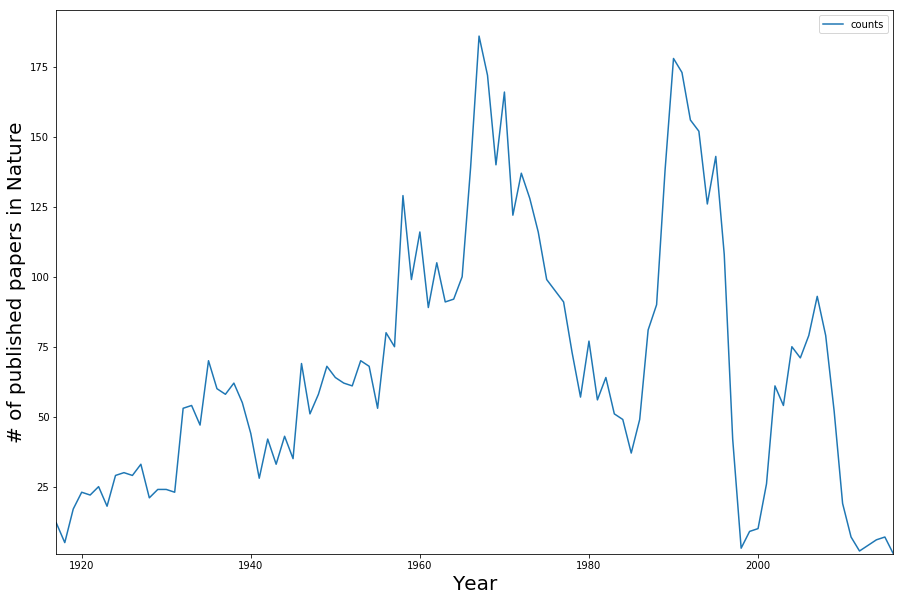

In [69]:
import matplotlib.pyplot as plt

df_clean = df[numpy.isfinite(df['n_citation'])]
df_clean = df_clean.loc[df['lang'] == 'en']
df_clean = df_clean.loc[df['venue'] == 'Nature']
df_clean = df_clean[['id','title', 'abstract', 'authors', 'keywords', 'lang', 'n_citation', 'references', 'url', 'venue', 'year']]
df_clean = df_clean.sort_values(['n_citation'], ascending=[False])
# df_clean.head(20).to_csv('sample.csv', sep=',', index=False)
# df_clean.head(10).to_csv('sample.csv', sep=',', index=False)
df_clean

df_with_venue_citations = df_clean.groupby(['year']).size().reset_index(name='counts')
df_with_venue_citations = df_with_venue_citations.tail(100)

plt.rcParams['figure.figsize']=(15,10)
ans = df_with_venue_citations[['year','counts']].plot.line('year', 'counts')
ans.set_ylim(ymin=1)
ans.set_xlabel("Year", fontsize=20)
ans.set_ylabel("# of published papers in Nature", fontsize=20)
plt.show()

# df_with_venue_citations = df_with_venue_citations.sort_values(['n_citation'], ascending=[False])
# df_with_venue_citations.head(20).to_csv('top_venues.csv', sep=',', index=False)

# df_clean = df_clean[numpy.isfinite(df_clean['venue'])]

In [ ]:
# Getting CS keywords